**Initializing all necessary variables and checking whether given dataset exists**

In [ ]:
import os

# Defining important parameters for images and data
DATA_PATH = "/content/drive/MyDrive/data"
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
TESTING_SIZE = 0.25

# Training parameters
BATCH_SIZE = 16
EPOCHS = 50
LOSS_FUNCTION = 'categorical_crossentropy'

print('Does specified data path exists?', os.path.exists(DATA_PATH))

Does specified data path exists? True


**Find the total number of classes in the dataset**

In [ ]:
# Load class labels
class_labels = os.listdir(DATA_PATH)
class_labels.sort()

num_of_classes = len(class_labels)
print('Total number of classes:', num_of_classes)

Total number of classes: 30


**Create an ImageDataGenerator to load all images from all class/folders into the program. Then modify the images according to image height and width. Finally create two different sets of data - training and testing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imageGenerator = ImageDataGenerator(rescale=1./255,
                                    validation_split=TESTING_SIZE)

train_generator = imageGenerator.flow_from_directory(DATA_PATH,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='categorical',
                                                     batch_size=BATCH_SIZE,
                                                     subset='training')

test_generator = imageGenerator.flow_from_directory(DATA_PATH,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE,
                                                    subset='validation')

Found 1385 images belonging to 30 classes.
Found 449 images belonging to 30 classes.


**Create a Tensorflow CNN classifier using various layers APIs available in Tensorflow**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Dense(num_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',  # rmsprop
              metrics=['accuracy'])

**Train the CNN classifier with given hyperparameters and training dataset**

In [ ]:
history = model.fit(
        train_generator,
        
        steps_per_epoch= 1386 // BATCH_SIZE,
        epochs=50,
        validation_data=test_generator,
        validation_steps= 449 // BATCH_SIZE)

Epoch 1/50
86/86 [==============================] - 1148s 13s/step - loss: 2.3947 - accuracy: 0.3489 - val_loss: 1.5702 - val_accuracy: 0.5826
Epoch 2/50
86/86 [==============================] - 48s 555ms/step - loss: 1.2087 - accuracy: 0.6467 - val_loss: 1.3357 - val_accuracy: 0.6339
Epoch 3/50
86/86 [==============================] - 57s 671ms/step - loss: 0.7717 - accuracy: 0.7664 - val_loss: 1.4086 - val_accuracy: 0.6272
Epoch 4/50
86/86 [==============================] - 57s 666ms/step - loss: 0.5180 - accuracy: 0.8299 - val_loss: 1.2408 - val_accuracy: 0.7121
Epoch 5/50
86/86 [==============================] - 47s 549ms/step - loss: 0.3933 - accuracy: 0.8737 - val_loss: 1.2430 - val_accuracy: 0.7277
Epoch 6/50
86/86 [==============================] - 47s 551ms/step - loss: 0.2953 - accuracy: 0.9139 - val_loss: 1.1457 - val_accuracy: 0.7277
Epoch 7/50
86/86 [==============================] - 49s 566ms/step - loss: 0.2234 - accuracy: 0.9277 - val_loss: 1.1578 - val_accuracy: 0.7679

In [ ]:
rtrain = model.evaluate(train_generator, verbose=False)
rtest = model.evaluate(test_generator, verbose=False)

print("Training loss: %.4f, Training accuracy: %.2f"%(rtrain[0], rtrain[1] * 100))
print("Testing loss: %.4f, Testing accuracy: %.2f"%(rtest[0], rtest[1] * 100))

Training loss: 0.0012, Training accuracy: 100.00
Testing loss: 2.2535, Testing accuracy: 75.28


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

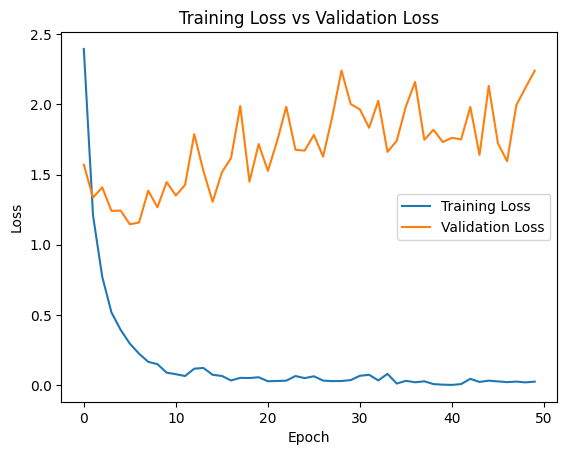

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Generate the plot
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

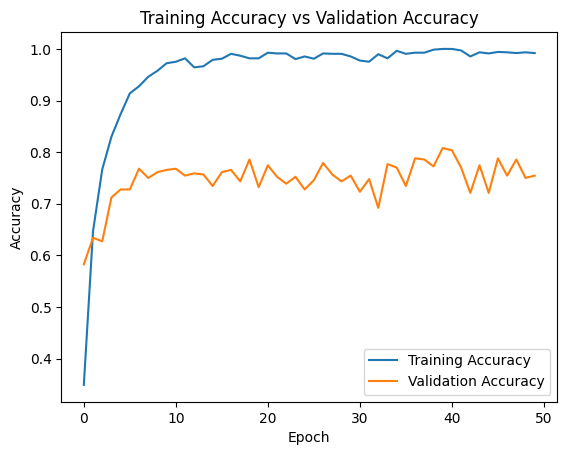

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Generate the plot
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
file = open("medinet.tflite", "wb")
file.write(tflite_model)
file.close()
print("Model saved")

Model saved
